In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats

In [ ]:
aotizhongxin_df = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/master/PRSA_Data_20130301-20170228/PRSA_Data_Aotizhongxin_20130301-20170228.csv")
aotizhongxin_df.describe()
aotizhongxin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


### CEK MISSING VALUES

In [ ]:
print(aotizhongxin_df.isna().sum())

No            0
year          0
month         0
day           0
hour          0
PM2.5       925
PM10        718
SO2         935
NO2        1023
CO         1776
O3         1719
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64


### CEK APAKAH DISTRIBUSI NORMAL, JIKA NORMAL MAKA ISI MISSING VALUES DENGAN MEAN, JIKA TIDAK ISI DENGAN MEDIAN

[[<Axes: title={'center': 'No'}> <Axes: title={'center': 'year'}>
  <Axes: title={'center': 'month'}> <Axes: title={'center': 'day'}>]
 [<Axes: title={'center': 'hour'}> <Axes: title={'center': 'PM2.5'}>
  <Axes: title={'center': 'PM10'}> <Axes: title={'center': 'SO2'}>]
 [<Axes: title={'center': 'NO2'}> <Axes: title={'center': 'CO'}>
  <Axes: title={'center': 'O3'}> <Axes: title={'center': 'TEMP'}>]
 [<Axes: title={'center': 'PRES'}> <Axes: title={'center': 'DEWP'}>
  <Axes: title={'center': 'RAIN'}> <Axes: title={'center': 'WSPM'}>]]


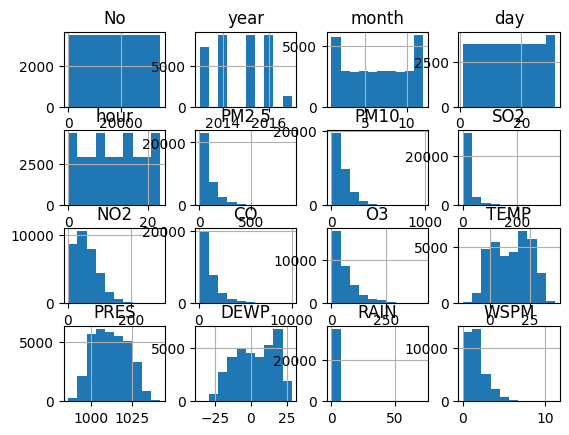

In [ ]:
print(aotizhongxin_df.hist())

In [ ]:
def checkNormality(data):
  for column_name, column_values in data.items():
    if pd.api.types.is_numeric_dtype(column_values):
      sdev = column_values.std()
      print(f"Standard Deviation of {column_name}: {sdev}")
      p_values = stats.shapiro(column_values)
      print(f"With p-values of {column_name}: {p_values}")

In [ ]:
checkNormality(aotizhongxin_df)

Standard Deviation of No: 10122.24925597073
With p-values of No: ShapiroResult(statistic=0.9549350142478943, pvalue=0.0)
Standard Deviation of year: 1.1772134318198135
With p-values of year: ShapiroResult(statistic=0.8959008455276489, pvalue=0.0)
Standard Deviation of month: 3.4487523600478474
With p-values of month: ShapiroResult(statistic=0.9415743350982666, pvalue=0.0)
Standard Deviation of day: 8.800217529431565
With p-values of day: ShapiroResult(statistic=0.9540229439735413, pvalue=0.0)
Standard Deviation of hour: 6.92228526242799
With p-values of hour: ShapiroResult(statistic=0.9509114623069763, pvalue=0.0)
Standard Deviation of PM2.5: 81.14223289929701
With p-values of PM2.5: ShapiroResult(statistic=0.8102927207946777, pvalue=0.0)
Standard Deviation of PM10: 94.29957421450192
With p-values of PM10: ShapiroResult(statistic=0.8536017537117004, pvalue=0.0)
Standard Deviation of SO2: 22.55705661007395
With p-values of SO2: ShapiroResult(statistic=0.6717053651809692, pvalue=0.0)
Sta

SO ALL THE COLUMN IS MOST LIKELY NORMAL DISTRIBUTION, SO WE WILL FILL IT WITH MEDIAN

In [ ]:
def fillMissingValues(data):
  for column_name, column_values in data.items():
    if pd.api.types.is_numeric_dtype(column_values):
      column_values.fillna(value=column_values.median(), inplace=True)
      print(f"Missing values in {column_name} after: {column_values.isna().sum()}")

In [ ]:
fillMissingValues(aotizhongxin_df)

Missing values in No after: 0
Missing values in year after: 0
Missing values in month after: 0
Missing values in day after: 0
Missing values in hour after: 0
Missing values in PM2.5 after: 0
Missing values in PM10 after: 0
Missing values in SO2 after: 0
Missing values in NO2 after: 0
Missing values in CO after: 0
Missing values in O3 after: 0
Missing values in TEMP after: 0
Missing values in PRES after: 0
Missing values in DEWP after: 0
Missing values in RAIN after: 0
Missing values in WSPM after: 0


In [ ]:
changping_df = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/master/PRSA_Data_20130301-20170228/PRSA_Data_Changping_20130301-20170228.csv")
changping_df.describe()


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34290.000000,34482.000000,34436.000000,34397.000000,33543.000000,34460.000000,35011.000000,35014.000000,35011.000000,35013.000000,35021.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,71.099743,94.657871,14.958906,44.182086,1152.301345,57.940003,13.686111,1007.760278,1.505495,0.060366,1.853836
std,10122.249256,1.177213,3.448752,8.800218,6.922285,72.326926,83.441738,20.975331,29.519796,1103.056282,54.316674,11.365313,10.225664,13.822099,0.752899,1.309808
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.847700,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,18.000000,34.000000,2.000000,22.000000,500.000000,15.636600,3.400000,999.300000,-10.200000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,46.000000,72.000000,7.000000,36.000000,800.000000,46.000000,14.700000,1007.400000,1.800000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,100.000000,131.000000,18.000000,60.358200,1400.000000,80.000000,23.300000,1016.000000,14.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,882.000000,999.000000,310.000000,226.000000,10000.000000,429.000000,41.400000,1036.500000,27.200000,52.100000,10.000000


No            0
year          0
month         0
day           0
hour          0
PM2.5       774
PM10        582
SO2         628
NO2         667
CO         1521
O3          604
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64
[[<Axes: title={'center': 'No'}> <Axes: title={'center': 'year'}>
  <Axes: title={'center': 'month'}> <Axes: title={'center': 'day'}>]
 [<Axes: title={'center': 'hour'}> <Axes: title={'center': 'PM2.5'}>
  <Axes: title={'center': 'PM10'}> <Axes: title={'center': 'SO2'}>]
 [<Axes: title={'center': 'NO2'}> <Axes: title={'center': 'CO'}>
  <Axes: title={'center': 'O3'}> <Axes: title={'center': 'TEMP'}>]
 [<Axes: title={'center': 'PRES'}> <Axes: title={'center': 'DEWP'}>
  <Axes: title={'center': 'RAIN'}> <Axes: title={'center': 'WSPM'}>]]


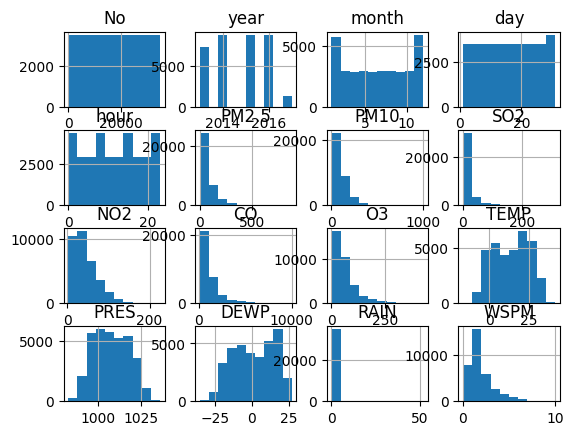

In [ ]:
print(changping_df.isna().sum())
print(changping_df.hist())

In [ ]:
checkNormality(changping_df)


Standard Deviation of No: 10122.24925597073
With p-values of No: ShapiroResult(statistic=0.9549350142478943, pvalue=0.0)
Standard Deviation of year: 1.1772134318198135
With p-values of year: ShapiroResult(statistic=0.8959008455276489, pvalue=0.0)
Standard Deviation of month: 3.4487523600478474
With p-values of month: ShapiroResult(statistic=0.9415743350982666, pvalue=0.0)
Standard Deviation of day: 8.800217529431565
With p-values of day: ShapiroResult(statistic=0.9540229439735413, pvalue=0.0)
Standard Deviation of hour: 6.92228526242799
With p-values of hour: ShapiroResult(statistic=0.9509114623069763, pvalue=0.0)
Standard Deviation of PM2.5: 72.32692612502073
With p-values of PM2.5: ShapiroResult(statistic=nan, pvalue=1.0)
Standard Deviation of PM10: 83.4417384209278
With p-values of PM10: ShapiroResult(statistic=nan, pvalue=1.0)
Standard Deviation of SO2: 20.975331415701532
With p-values of SO2: ShapiroResult(statistic=nan, pvalue=1.0)
Standard Deviation of NO2: 29.51979628553117
Wit

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
fillMissingValues(changping_df)

Missing values in No after: 0
Missing values in year after: 0
Missing values in month after: 0
Missing values in day after: 0
Missing values in hour after: 0
Missing values in PM2.5 after: 0
Missing values in PM10 after: 0
Missing values in SO2 after: 0
Missing values in NO2 after: 0
Missing values in CO after: 0
Missing values in O3 after: 0
Missing values in TEMP after: 0
Missing values in PRES after: 0
Missing values in DEWP after: 0
Missing values in RAIN after: 0
Missing values in WSPM after: 0


In [ ]:
dingling_df = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/master/PRSA_Data_20130301-20170228/PRSA_Data_Dingling_20130301-20170228.csv")
dingling_df.describe()


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34285.000000,34408.000000,34334.000000,33830.000000,33052.000000,33850.000000,35011.000000,35014.000000,35011.000000,35013.000000,35021.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,65.989497,83.739723,11.749650,27.585467,904.896073,68.548371,13.686111,1007.760278,1.505495,0.060366,1.853836
std,10122.249256,1.177213,3.448752,8.800218,6.922285,72.267723,79.541685,15.519259,26.383882,903.306220,53.764424,11.365313,10.225664,13.822099,0.752899,1.309808
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,14.000000,26.000000,2.000000,9.000000,300.000000,31.000000,3.400000,999.300000,-10.200000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,41.000000,60.000000,5.000000,19.000000,600.000000,61.000000,14.700000,1007.400000,1.800000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,93.000000,117.000000,15.000000,38.000000,1200.000000,90.000000,23.300000,1016.000000,14.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,881.000000,905.000000,156.000000,205.000000,10000.000000,500.000000,41.400000,1036.500000,27.200000,52.100000,10.000000


No            0
year          0
month         0
day           0
hour          0
PM2.5       779
PM10        656
SO2         730
NO2        1234
CO         2012
O3         1214
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64
[[<Axes: title={'center': 'No'}> <Axes: title={'center': 'year'}>
  <Axes: title={'center': 'month'}> <Axes: title={'center': 'day'}>]
 [<Axes: title={'center': 'hour'}> <Axes: title={'center': 'PM2.5'}>
  <Axes: title={'center': 'PM10'}> <Axes: title={'center': 'SO2'}>]
 [<Axes: title={'center': 'NO2'}> <Axes: title={'center': 'CO'}>
  <Axes: title={'center': 'O3'}> <Axes: title={'center': 'TEMP'}>]
 [<Axes: title={'center': 'PRES'}> <Axes: title={'center': 'DEWP'}>
  <Axes: title={'center': 'RAIN'}> <Axes: title={'center': 'WSPM'}>]]


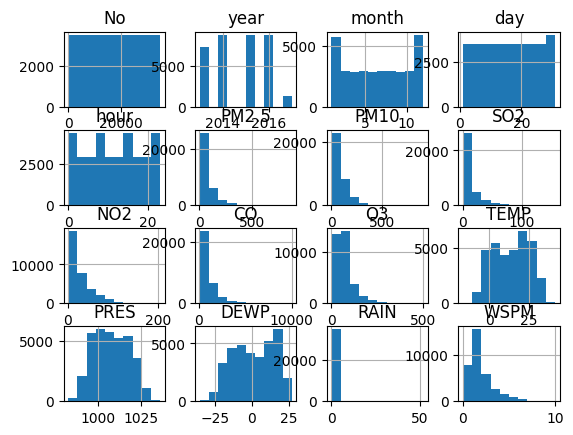

In [ ]:
print(dingling_df.isna().sum())
print(dingling_df.hist())

In [ ]:
checkNormality(dingling_df)

Standard Deviation of No: 10122.24925597073
With p-values of No: ShapiroResult(statistic=0.9549350142478943, pvalue=0.0)
Standard Deviation of year: 1.1772134318198135
With p-values of year: ShapiroResult(statistic=0.8959008455276489, pvalue=0.0)
Standard Deviation of month: 3.4487523600478474
With p-values of month: ShapiroResult(statistic=0.9415743350982666, pvalue=0.0)
Standard Deviation of day: 8.800217529431565
With p-values of day: ShapiroResult(statistic=0.9540229439735413, pvalue=0.0)
Standard Deviation of hour: 6.92228526242799
With p-values of hour: ShapiroResult(statistic=0.9509114623069763, pvalue=0.0)
Standard Deviation of PM2.5: 72.26772326105232
With p-values of PM2.5: ShapiroResult(statistic=nan, pvalue=1.0)
Standard Deviation of PM10: 79.5416845611298
With p-values of PM10: ShapiroResult(statistic=nan, pvalue=1.0)
Standard Deviation of SO2: 15.519259061819355
With p-values of SO2: ShapiroResult(statistic=nan, pvalue=1.0)
Standard Deviation of NO2: 26.383882215560565
Wi

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
fillMissingValues(dingling_df)

Missing values in No after: 0
Missing values in year after: 0
Missing values in month after: 0
Missing values in day after: 0
Missing values in hour after: 0
Missing values in PM2.5 after: 0
Missing values in PM10 after: 0
Missing values in SO2 after: 0
Missing values in NO2 after: 0
Missing values in CO after: 0
Missing values in O3 after: 0
Missing values in TEMP after: 0
Missing values in PRES after: 0
Missing values in DEWP after: 0
Missing values in RAIN after: 0
Missing values in WSPM after: 0


In [ ]:
dongsi_df = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/master/PRSA_Data_20130301-20170228/PRSA_Data_Dongsi_20130301-20170228.csv")
dongsi_df.describe()


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34314.000000,34511.000000,34401.000000,33463.000000,31867.000000,34400.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,86.194297,110.336742,18.531107,53.699443,1330.069131,57.210637,13.671490,1012.547419,2.447535,0.064020,1.860785
std,10122.249256,1.177213,3.448752,8.800218,6.922285,86.575127,98.219860,22.905655,33.959230,1191.305887,58.033275,11.458418,10.266059,13.810696,0.786282,1.280368
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.642600,-16.800000,987.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,4.000000,27.000000,600.000000,12.000000,3.100000,1004.000000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,61.000000,86.000000,10.000000,47.000000,1000.000000,44.125200,14.600000,1012.200000,3.000000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,119.000000,151.000000,24.000000,73.000000,1700.000000,81.000000,23.500000,1020.900000,15.000000,0.000000,2.400000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,737.000000,955.000000,300.000000,258.000000,10000.000000,1071.000000,41.100000,1042.000000,28.800000,46.400000,10.500000


No            0
year          0
month         0
day           0
hour          0
PM2.5       750
PM10        553
SO2         663
NO2        1601
CO         3197
O3          664
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64
[[<Axes: title={'center': 'No'}> <Axes: title={'center': 'year'}>
  <Axes: title={'center': 'month'}> <Axes: title={'center': 'day'}>]
 [<Axes: title={'center': 'hour'}> <Axes: title={'center': 'PM2.5'}>
  <Axes: title={'center': 'PM10'}> <Axes: title={'center': 'SO2'}>]
 [<Axes: title={'center': 'NO2'}> <Axes: title={'center': 'CO'}>
  <Axes: title={'center': 'O3'}> <Axes: title={'center': 'TEMP'}>]
 [<Axes: title={'center': 'PRES'}> <Axes: title={'center': 'DEWP'}>
  <Axes: title={'center': 'RAIN'}> <Axes: title={'center': 'WSPM'}>]]


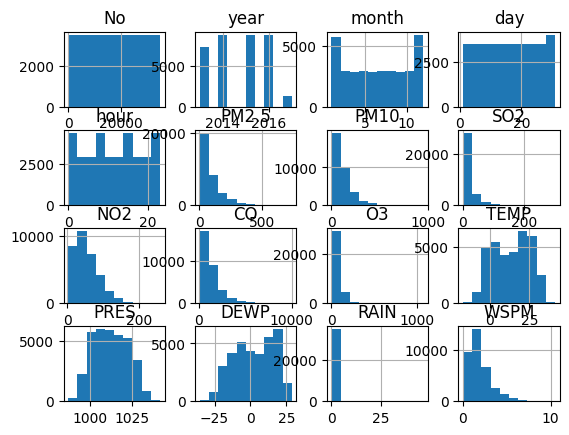

In [ ]:
print(dongsi_df.isna().sum())
print(dongsi_df.hist())

In [ ]:
checkNormality(dongsi_df)

Standard Deviation of No: 10122.24925597073
With p-values of No: ShapiroResult(statistic=0.9549350142478943, pvalue=0.0)
Standard Deviation of year: 1.1772134318198135
With p-values of year: ShapiroResult(statistic=0.8959008455276489, pvalue=0.0)
Standard Deviation of month: 3.4487523600478474
With p-values of month: ShapiroResult(statistic=0.9415743350982666, pvalue=0.0)
Standard Deviation of day: 8.800217529431565
With p-values of day: ShapiroResult(statistic=0.9540229439735413, pvalue=0.0)
Standard Deviation of hour: 6.92228526242799
With p-values of hour: ShapiroResult(statistic=0.9509114623069763, pvalue=0.0)
Standard Deviation of PM2.5: 86.57512686755727
With p-values of PM2.5: ShapiroResult(statistic=nan, pvalue=1.0)
Standard Deviation of PM10: 98.21985993314779
With p-values of PM10: ShapiroResult(statistic=nan, pvalue=1.0)
Standard Deviation of SO2: 22.90565482684019
With p-values of SO2: ShapiroResult(statistic=nan, pvalue=1.0)
Standard Deviation of NO2: 33.95922959673305
Wit

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
fillMissingValues(dongsi_df)

Missing values in No after: 0
Missing values in year after: 0
Missing values in month after: 0
Missing values in day after: 0
Missing values in hour after: 0
Missing values in PM2.5 after: 0
Missing values in PM10 after: 0
Missing values in SO2 after: 0
Missing values in NO2 after: 0
Missing values in CO after: 0
Missing values in O3 after: 0
Missing values in TEMP after: 0
Missing values in PRES after: 0
Missing values in DEWP after: 0
Missing values in RAIN after: 0
Missing values in WSPM after: 0


In [ ]:
wanshouxigong_df = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/master/PRSA_Data_20130301-20170228/PRSA_Data_Wanshouxigong_20130301-20170228.csv")
wanshouxigong_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34368.000000,34580.000000,34395.000000,34310.00000,33767.000000,33986.000000,35045.000000,35045.000000,35045.000000,35045.000000,35051.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,85.024136,112.223459,17.148603,55.52956,1370.395031,56.229904,13.784477,1011.511804,2.707442,0.064320,1.745314
std,10122.249256,1.177213,3.448752,8.800218,6.922285,85.975981,97.593210,23.940834,35.80805,1223.139114,57.082710,11.385156,10.570928,13.704139,0.796981,1.206355
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.00000,100.000000,0.214200,-16.800000,985.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,39.000000,3.000000,28.00000,600.000000,8.000000,3.400000,1002.800000,-8.500000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,60.000000,91.000000,8.000000,49.00000,1000.000000,42.000000,14.800000,1011.000000,3.300000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,116.000000,154.000000,21.000000,77.00000,1700.000000,82.000000,23.500000,1020.000000,15.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,961.000000,411.000000,251.00000,9800.000000,358.000000,40.600000,1042.000000,28.500000,46.400000,13.200000


No            0
year          0
month         0
day           0
hour          0
PM2.5       696
PM10        484
SO2         669
NO2         754
CO         1297
O3         1078
TEMP         19
PRES         19
DEWP         19
RAIN         19
wd           79
WSPM         13
station       0
dtype: int64
[[<Axes: title={'center': 'No'}> <Axes: title={'center': 'year'}>
  <Axes: title={'center': 'month'}> <Axes: title={'center': 'day'}>]
 [<Axes: title={'center': 'hour'}> <Axes: title={'center': 'PM2.5'}>
  <Axes: title={'center': 'PM10'}> <Axes: title={'center': 'SO2'}>]
 [<Axes: title={'center': 'NO2'}> <Axes: title={'center': 'CO'}>
  <Axes: title={'center': 'O3'}> <Axes: title={'center': 'TEMP'}>]
 [<Axes: title={'center': 'PRES'}> <Axes: title={'center': 'DEWP'}>
  <Axes: title={'center': 'RAIN'}> <Axes: title={'center': 'WSPM'}>]]


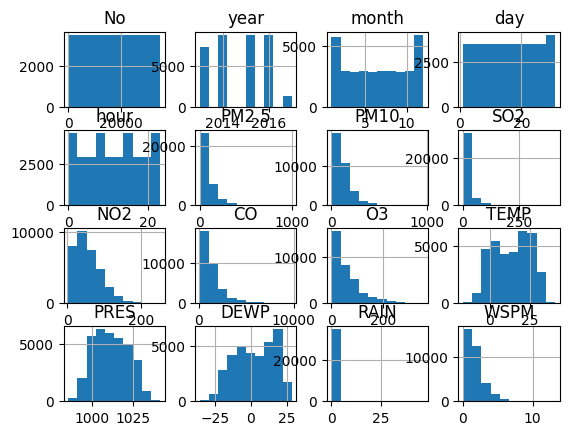

In [ ]:
print(wanshouxigong_df.isna().sum())
print(wanshouxigong_df.hist())

In [ ]:
checkNormality(wanshouxigong_df)

Standard Deviation of No: 10122.24925597073
With p-values of No: ShapiroResult(statistic=0.9549350142478943, pvalue=0.0)
Standard Deviation of year: 1.1772134318198135
With p-values of year: ShapiroResult(statistic=0.8959008455276489, pvalue=0.0)
Standard Deviation of month: 3.4487523600478474
With p-values of month: ShapiroResult(statistic=0.9415743350982666, pvalue=0.0)
Standard Deviation of day: 8.800217529431565
With p-values of day: ShapiroResult(statistic=0.9540229439735413, pvalue=0.0)
Standard Deviation of hour: 6.92228526242799
With p-values of hour: ShapiroResult(statistic=0.9509114623069763, pvalue=0.0)
Standard Deviation of PM2.5: 85.97598115736476
With p-values of PM2.5: ShapiroResult(statistic=nan, pvalue=1.0)
Standard Deviation of PM10: 97.59320984877719
With p-values of PM10: ShapiroResult(statistic=nan, pvalue=1.0)
Standard Deviation of SO2: 23.940833792074415
With p-values of SO2: ShapiroResult(statistic=nan, pvalue=1.0)
Standard Deviation of NO2: 35.80804962419214
Wi

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
fillMissingValues(wanshouxigong_df)

Missing values in No after: 0
Missing values in year after: 0
Missing values in month after: 0
Missing values in day after: 0
Missing values in hour after: 0
Missing values in PM2.5 after: 0
Missing values in PM10 after: 0
Missing values in SO2 after: 0
Missing values in NO2 after: 0
Missing values in CO after: 0
Missing values in O3 after: 0
Missing values in TEMP after: 0
Missing values in PRES after: 0
Missing values in DEWP after: 0
Missing values in RAIN after: 0
Missing values in WSPM after: 0


In [ ]:
wanliu_df = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/master/PRSA_Data_20130301-20170228/PRSA_Data_Wanliu_20130301-20170228.csv")
wanliu_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34682.000000,34780.000000,34489.000000,33994.000000,33252.000000,32957.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,83.374716,110.464618,18.376481,65.258789,1319.353513,48.873614,13.428865,1011.097536,3.266588,0.068263,1.501215
std,10122.249256,1.177213,3.448752,8.800218,6.922285,81.905568,92.795065,22.609648,37.996088,1268.114331,55.111740,11.346931,10.355247,13.678060,0.896726,1.104472
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.642400,100.000000,0.214200,-15.800000,985.900000,-34.900000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,40.000000,4.000000,36.000000,500.000000,4.000000,3.200000,1002.500000,-8.100000,0.000000,0.800000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,88.000000,10.000000,60.000000,900.000000,32.000000,14.300000,1010.800000,4.000000,0.000000,1.200000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,116.000000,153.000000,23.000000,88.000000,1600.000000,73.000000,22.900000,1019.400000,15.800000,0.000000,2.000000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,957.000000,951.000000,282.000000,264.000000,10000.000000,364.000000,40.500000,1040.300000,28.500000,72.500000,11.200000


No            0
year          0
month         0
day           0
hour          0
PM2.5       382
PM10        284
SO2         575
NO2        1070
CO         1812
O3         2107
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd          123
WSPM         14
station       0
dtype: int64
[[<Axes: title={'center': 'No'}> <Axes: title={'center': 'year'}>
  <Axes: title={'center': 'month'}> <Axes: title={'center': 'day'}>]
 [<Axes: title={'center': 'hour'}> <Axes: title={'center': 'PM2.5'}>
  <Axes: title={'center': 'PM10'}> <Axes: title={'center': 'SO2'}>]
 [<Axes: title={'center': 'NO2'}> <Axes: title={'center': 'CO'}>
  <Axes: title={'center': 'O3'}> <Axes: title={'center': 'TEMP'}>]
 [<Axes: title={'center': 'PRES'}> <Axes: title={'center': 'DEWP'}>
  <Axes: title={'center': 'RAIN'}> <Axes: title={'center': 'WSPM'}>]]


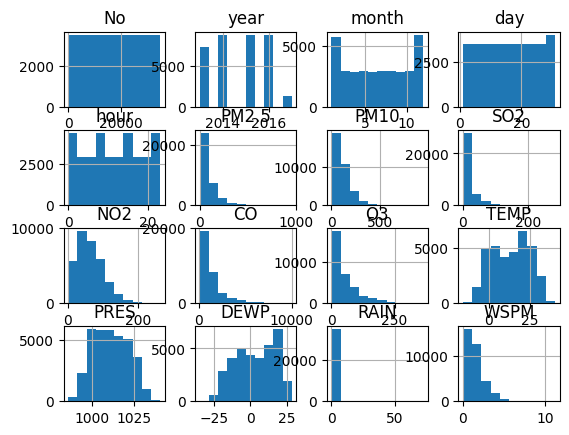

In [ ]:
print(wanliu_df.isna().sum())
print(wanliu_df.hist())

In [ ]:
checkNormality(wanliu_df)

Standard Deviation of No: 10122.24925597073
With p-values of No: ShapiroResult(statistic=0.9549350142478943, pvalue=0.0)
Standard Deviation of year: 1.1772134318198135
With p-values of year: ShapiroResult(statistic=0.8959008455276489, pvalue=0.0)
Standard Deviation of month: 3.4487523600478474
With p-values of month: ShapiroResult(statistic=0.9415743350982666, pvalue=0.0)
Standard Deviation of day: 8.800217529431565
With p-values of day: ShapiroResult(statistic=0.9540229439735413, pvalue=0.0)
Standard Deviation of hour: 6.92228526242799
With p-values of hour: ShapiroResult(statistic=0.9509114623069763, pvalue=0.0)
Standard Deviation of PM2.5: 81.90556817417298
With p-values of PM2.5: ShapiroResult(statistic=nan, pvalue=1.0)
Standard Deviation of PM10: 92.79506486824089
With p-values of PM10: ShapiroResult(statistic=nan, pvalue=1.0)
Standard Deviation of SO2: 22.609647740471033
With p-values of SO2: ShapiroResult(statistic=nan, pvalue=1.0)
Standard Deviation of NO2: 37.99608792528771
Wi

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
fillMissingValues(wanliu_df)

Missing values in No after: 0
Missing values in year after: 0
Missing values in month after: 0
Missing values in day after: 0
Missing values in hour after: 0
Missing values in PM2.5 after: 0
Missing values in PM10 after: 0
Missing values in SO2 after: 0
Missing values in NO2 after: 0
Missing values in CO after: 0
Missing values in O3 after: 0
Missing values in TEMP after: 0
Missing values in PRES after: 0
Missing values in DEWP after: 0
Missing values in RAIN after: 0
Missing values in WSPM after: 0


In [ ]:
tiantan_df = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/master/PRSA_Data_20130301-20170228/PRSA_Data_Tiantan_20130301-20170228.csv")
tiantan_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34387.000000,34467.000000,33946.000000,34320.000000,33938.000000,34221.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.164911,106.363672,14.367615,53.162646,1298.303318,55.984297,13.671490,1012.547419,2.447535,0.064020,1.860785
std,10122.249256,1.177213,3.448752,8.800218,6.922285,80.921384,89.700157,20.144631,31.946224,1170.593297,59.081528,11.458418,10.266059,13.810696,0.786282,1.280368
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.571200,2.000000,100.000000,0.428400,-16.800000,987.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,41.000000,3.000000,28.000000,500.000000,8.000000,3.100000,1004.000000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,85.000000,7.000000,47.000000,900.000000,40.000000,14.600000,1012.200000,3.000000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,113.000000,144.000000,17.000000,71.000000,1600.000000,81.000000,23.500000,1020.900000,15.000000,0.000000,2.400000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,821.000000,988.000000,273.000000,241.000000,10000.000000,674.000000,41.100000,1042.000000,28.800000,46.400000,10.500000


No            0
year          0
month         0
day           0
hour          0
PM2.5       677
PM10        597
SO2        1118
NO2         744
CO         1126
O3          843
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64
[[<Axes: title={'center': 'No'}> <Axes: title={'center': 'year'}>
  <Axes: title={'center': 'month'}> <Axes: title={'center': 'day'}>]
 [<Axes: title={'center': 'hour'}> <Axes: title={'center': 'PM2.5'}>
  <Axes: title={'center': 'PM10'}> <Axes: title={'center': 'SO2'}>]
 [<Axes: title={'center': 'NO2'}> <Axes: title={'center': 'CO'}>
  <Axes: title={'center': 'O3'}> <Axes: title={'center': 'TEMP'}>]
 [<Axes: title={'center': 'PRES'}> <Axes: title={'center': 'DEWP'}>
  <Axes: title={'center': 'RAIN'}> <Axes: title={'center': 'WSPM'}>]]


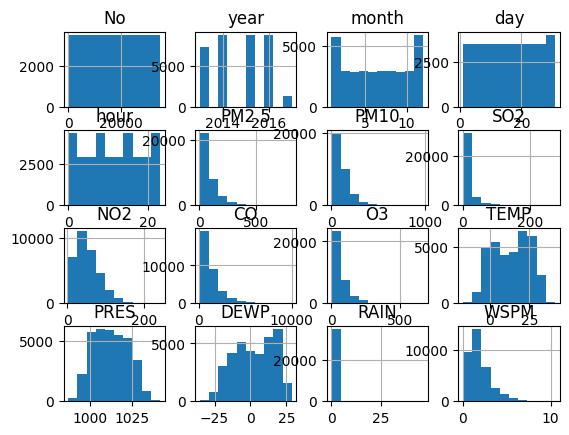

In [ ]:
print(tiantan_df.isna().sum())
print(tiantan_df.hist())

In [ ]:
checkNormality(tiantan_df)

Standard Deviation of No: 10122.24925597073
With p-values of No: ShapiroResult(statistic=0.9549350142478943, pvalue=0.0)
Standard Deviation of year: 1.1772134318198135
With p-values of year: ShapiroResult(statistic=0.8959008455276489, pvalue=0.0)
Standard Deviation of month: 3.4487523600478474
With p-values of month: ShapiroResult(statistic=0.9415743350982666, pvalue=0.0)
Standard Deviation of day: 8.800217529431565
With p-values of day: ShapiroResult(statistic=0.9540229439735413, pvalue=0.0)
Standard Deviation of hour: 6.92228526242799
With p-values of hour: ShapiroResult(statistic=0.9509114623069763, pvalue=0.0)
Standard Deviation of PM2.5: 80.92138407972625
With p-values of PM2.5: ShapiroResult(statistic=nan, pvalue=1.0)
Standard Deviation of PM10: 89.70015677698042
With p-values of PM10: ShapiroResult(statistic=nan, pvalue=1.0)
Standard Deviation of SO2: 20.144631472751104
With p-values of SO2: ShapiroResult(statistic=nan, pvalue=1.0)
Standard Deviation of NO2: 31.946223892085097
W

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
fillMissingValues(tiantan_df)

Missing values in No after: 0
Missing values in year after: 0
Missing values in month after: 0
Missing values in day after: 0
Missing values in hour after: 0
Missing values in PM2.5 after: 0
Missing values in PM10 after: 0
Missing values in SO2 after: 0
Missing values in NO2 after: 0
Missing values in CO after: 0
Missing values in O3 after: 0
Missing values in TEMP after: 0
Missing values in PRES after: 0
Missing values in DEWP after: 0
Missing values in RAIN after: 0
Missing values in WSPM after: 0


In [ ]:
shunyi_df = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/master/PRSA_Data_20130301-20170228/PRSA_Data_Shunyi_20130301-20170228.csv")
shunyi_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34151.000000,34516.000000,33768.000000,33699.000000,32886.000000,33575.000000,35013.000000,35013.000000,35010.000000,35013.000000,35020.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.491602,98.737026,13.572039,43.908865,1187.063979,55.201321,13.387969,1013.061938,2.465036,0.061094,1.807533
std,10122.249256,1.177213,3.448752,8.800218,6.922285,81.231739,89.143718,19.572068,30.996828,1156.374102,54.873726,11.483588,10.177339,13.726622,0.761668,1.287817
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,988.000000,-36.000000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,19.000000,31.000000,2.000000,19.000000,400.000000,10.000000,3.000000,1004.700000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,77.000000,5.000000,37.000000,800.000000,43.000000,14.400000,1012.700000,3.100000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,112.000000,138.000000,17.000000,62.000000,1500.000000,77.000000,23.200000,1021.000000,15.100000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,941.000000,999.000000,239.000000,258.000000,10000.000000,351.716400,40.600000,1042.800000,27.500000,37.300000,12.800000


No            0
year          0
month         0
day           0
hour          0
PM2.5       913
PM10        548
SO2        1296
NO2        1365
CO         2178
O3         1489
TEMP         51
PRES         51
DEWP         54
RAIN         51
wd          483
WSPM         44
station       0
dtype: int64
[[<Axes: title={'center': 'No'}> <Axes: title={'center': 'year'}>
  <Axes: title={'center': 'month'}> <Axes: title={'center': 'day'}>]
 [<Axes: title={'center': 'hour'}> <Axes: title={'center': 'PM2.5'}>
  <Axes: title={'center': 'PM10'}> <Axes: title={'center': 'SO2'}>]
 [<Axes: title={'center': 'NO2'}> <Axes: title={'center': 'CO'}>
  <Axes: title={'center': 'O3'}> <Axes: title={'center': 'TEMP'}>]
 [<Axes: title={'center': 'PRES'}> <Axes: title={'center': 'DEWP'}>
  <Axes: title={'center': 'RAIN'}> <Axes: title={'center': 'WSPM'}>]]


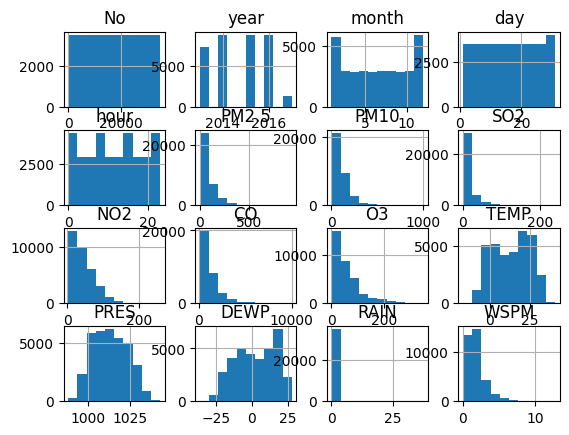

In [ ]:
print(shunyi_df.isna().sum())
print(shunyi_df.hist())

In [ ]:
nongzhanguan_df = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/master/PRSA_Data_20130301-20170228/PRSA_Data_Nongzhanguan_20130301-20170228.csv")
nongzhanguan_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34436.000000,34624.000000,34618.000000,34372.000000,33858.000000,34558.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,84.838483,108.991096,18.689242,58.097172,1324.350198,58.534682,13.671490,1012.547419,2.447535,0.064020,1.860785
std,10122.249256,1.177213,3.448752,8.800218,6.922285,86.225344,95.341177,24.280665,36.297740,1245.166124,58.401448,11.458418,10.266059,13.810696,0.786282,1.280368
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.571200,2.000000,100.000000,0.214200,-16.800000,987.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,3.000000,29.000000,500.000000,10.000000,3.100000,1004.000000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,85.000000,9.000000,51.000000,900.000000,45.000000,14.600000,1012.200000,3.000000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,116.000000,149.000000,23.000000,80.000000,1600.000000,84.000000,23.500000,1020.900000,15.000000,0.000000,2.400000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,844.000000,995.000000,257.000000,273.000000,10000.000000,390.000000,41.100000,1042.000000,28.800000,46.400000,10.500000


No            0
year          0
month         0
day           0
hour          0
PM2.5       628
PM10        440
SO2         446
NO2         692
CO         1206
O3          506
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64
[[<Axes: title={'center': 'No'}> <Axes: title={'center': 'year'}>
  <Axes: title={'center': 'month'}> <Axes: title={'center': 'day'}>]
 [<Axes: title={'center': 'hour'}> <Axes: title={'center': 'PM2.5'}>
  <Axes: title={'center': 'PM10'}> <Axes: title={'center': 'SO2'}>]
 [<Axes: title={'center': 'NO2'}> <Axes: title={'center': 'CO'}>
  <Axes: title={'center': 'O3'}> <Axes: title={'center': 'TEMP'}>]
 [<Axes: title={'center': 'PRES'}> <Axes: title={'center': 'DEWP'}>
  <Axes: title={'center': 'RAIN'}> <Axes: title={'center': 'WSPM'}>]]


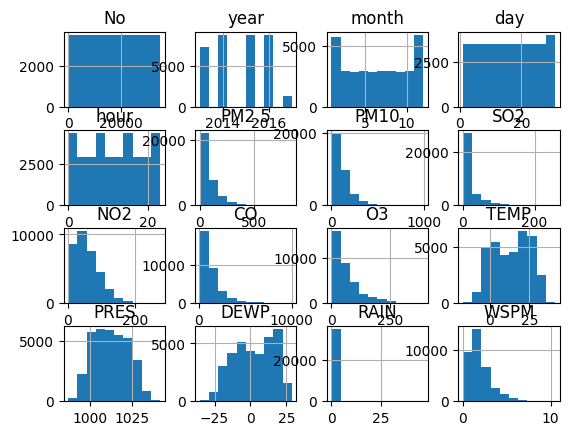

In [ ]:
print(nongzhanguan_df.isna().sum())
print(nongzhanguan_df.hist())

In [ ]:
checkNormality(nongzhanguan_df)

Standard Deviation of No: 10122.24925597073
With p-values of No: ShapiroResult(statistic=0.9549350142478943, pvalue=0.0)
Standard Deviation of year: 1.1772134318198135
With p-values of year: ShapiroResult(statistic=0.8959008455276489, pvalue=0.0)
Standard Deviation of month: 3.4487523600478474
With p-values of month: ShapiroResult(statistic=0.9415743350982666, pvalue=0.0)
Standard Deviation of day: 8.800217529431565
With p-values of day: ShapiroResult(statistic=0.9540229439735413, pvalue=0.0)
Standard Deviation of hour: 6.92228526242799
With p-values of hour: ShapiroResult(statistic=0.9509114623069763, pvalue=0.0)
Standard Deviation of PM2.5: 86.22534397739824
With p-values of PM2.5: ShapiroResult(statistic=nan, pvalue=1.0)
Standard Deviation of PM10: 95.34117679486624
With p-values of PM10: ShapiroResult(statistic=nan, pvalue=1.0)
Standard Deviation of SO2: 24.28066483064031
With p-values of SO2: ShapiroResult(statistic=nan, pvalue=1.0)
Standard Deviation of NO2: 36.29774028854907
Wit

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
fillMissingValues(nongzhanguan_df)

Missing values in No after: 0
Missing values in year after: 0
Missing values in month after: 0
Missing values in day after: 0
Missing values in hour after: 0
Missing values in PM2.5 after: 0
Missing values in PM10 after: 0
Missing values in SO2 after: 0
Missing values in NO2 after: 0
Missing values in CO after: 0
Missing values in O3 after: 0
Missing values in TEMP after: 0
Missing values in PRES after: 0
Missing values in DEWP after: 0
Missing values in RAIN after: 0
Missing values in WSPM after: 0


In [ ]:
huairou_df = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/master/PRSA_Data_20130301-20170228/PRSA_Data_Huairou_20130301-20170228.csv")
huairou_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34111.000000,34287.000000,34084.000000,33425.000000,33642.000000,33913.000000,35013.000000,35011.000000,35011.000000,35009.000000,35015.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,69.626367,91.482690,12.121553,32.497250,1022.554545,59.824713,12.445426,1007.598568,2.238619,0.067940,1.652021
std,10122.249256,1.177213,3.448752,8.800218,6.922285,71.224916,83.289578,18.896912,26.489531,898.738241,54.605746,11.751103,10.022101,14.052541,0.849046,1.199143
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.800000,-43.400000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,17.000000,28.000000,2.000000,12.000000,400.000000,18.000000,2.100000,999.300000,-9.600000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,47.000000,69.000000,4.000000,25.000000,800.000000,49.000000,13.600000,1007.300000,2.700000,0.000000,1.300000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,98.000000,131.000000,14.000000,46.000000,1300.000000,83.000000,22.300000,1015.500000,15.300000,0.000000,2.000000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,762.000000,993.000000,315.000000,231.000000,10000.000000,444.000000,40.300000,1036.500000,29.100000,45.900000,12.900000


No            0
year          0
month         0
day           0
hour          0
PM2.5       953
PM10        777
SO2         980
NO2        1639
CO         1422
O3         1151
TEMP         51
PRES         53
DEWP         53
RAIN         55
wd          302
WSPM         49
station       0
dtype: int64
[[<Axes: title={'center': 'No'}> <Axes: title={'center': 'year'}>
  <Axes: title={'center': 'month'}> <Axes: title={'center': 'day'}>]
 [<Axes: title={'center': 'hour'}> <Axes: title={'center': 'PM2.5'}>
  <Axes: title={'center': 'PM10'}> <Axes: title={'center': 'SO2'}>]
 [<Axes: title={'center': 'NO2'}> <Axes: title={'center': 'CO'}>
  <Axes: title={'center': 'O3'}> <Axes: title={'center': 'TEMP'}>]
 [<Axes: title={'center': 'PRES'}> <Axes: title={'center': 'DEWP'}>
  <Axes: title={'center': 'RAIN'}> <Axes: title={'center': 'WSPM'}>]]


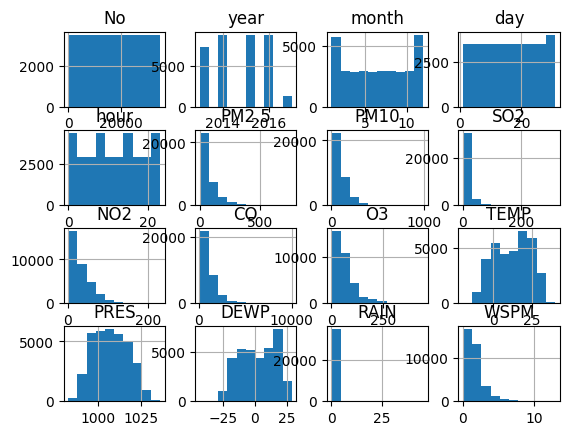

In [ ]:
print(huairou_df.isna().sum())
print(huairou_df.hist())

In [ ]:
checkNormality(huairou_df)

Standard Deviation of No: 10122.24925597073
With p-values of No: ShapiroResult(statistic=0.9549350142478943, pvalue=0.0)
Standard Deviation of year: 1.1772134318198135
With p-values of year: ShapiroResult(statistic=0.8959008455276489, pvalue=0.0)
Standard Deviation of month: 3.4487523600478474
With p-values of month: ShapiroResult(statistic=0.9415743350982666, pvalue=0.0)
Standard Deviation of day: 8.800217529431565
With p-values of day: ShapiroResult(statistic=0.9540229439735413, pvalue=0.0)
Standard Deviation of hour: 6.92228526242799
With p-values of hour: ShapiroResult(statistic=0.9509114623069763, pvalue=0.0)
Standard Deviation of PM2.5: 71.22491632107513
With p-values of PM2.5: ShapiroResult(statistic=nan, pvalue=1.0)
Standard Deviation of PM10: 83.28957818781265
With p-values of PM10: ShapiroResult(statistic=nan, pvalue=1.0)
Standard Deviation of SO2: 18.89691157946371
With p-values of SO2: ShapiroResult(statistic=nan, pvalue=1.0)
Standard Deviation of NO2: 26.489531011447063
Wi

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
fillMissingValues(huairou_df)

Missing values in No after: 0
Missing values in year after: 0
Missing values in month after: 0
Missing values in day after: 0
Missing values in hour after: 0
Missing values in PM2.5 after: 0
Missing values in PM10 after: 0
Missing values in SO2 after: 0
Missing values in NO2 after: 0
Missing values in CO after: 0
Missing values in O3 after: 0
Missing values in TEMP after: 0
Missing values in PRES after: 0
Missing values in DEWP after: 0
Missing values in RAIN after: 0
Missing values in WSPM after: 0


In [ ]:
gucheng_df = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/master/PRSA_Data_20130301-20170228/PRSA_Data_Gucheng_20130301-20170228.csv")
gucheng_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34418.000000,34683.000000,34557.000000,34396.000000,33663.000000,34335.000000,35013.000000,35014.000000,35013.000000,35021.000000,35022.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,83.852089,118.861978,15.366162,55.871075,1323.974423,57.694879,13.864524,1008.829592,2.610442,0.064453,1.343310
std,10122.249256,1.177213,3.448752,8.800218,6.922285,82.796445,96.742626,21.204526,36.473860,1208.957772,57.019587,11.292857,10.103256,13.782991,0.838654,1.151064
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-15.600000,984.000000,-34.600000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,24.000000,45.000000,2.000000,26.000000,600.000000,10.000000,3.600000,1000.500000,-8.900000,0.000000,0.600000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,60.000000,99.000000,7.000000,50.000000,900.000000,45.000000,14.800000,1008.500000,3.000000,0.000000,1.000000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,115.750000,167.000000,20.000000,79.000000,1600.000000,83.000000,23.500000,1017.000000,15.300000,0.000000,1.800000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,770.000000,994.000000,500.000000,276.000000,10000.000000,450.000000,41.600000,1038.100000,27.400000,41.900000,12.000000


No            0
year          0
month         0
day           0
hour          0
PM2.5       646
PM10        381
SO2         507
NO2         668
CO         1401
O3          729
TEMP         51
PRES         50
DEWP         51
RAIN         43
wd          159
WSPM         42
station       0
dtype: int64
[[<Axes: title={'center': 'No'}> <Axes: title={'center': 'year'}>
  <Axes: title={'center': 'month'}> <Axes: title={'center': 'day'}>]
 [<Axes: title={'center': 'hour'}> <Axes: title={'center': 'PM2.5'}>
  <Axes: title={'center': 'PM10'}> <Axes: title={'center': 'SO2'}>]
 [<Axes: title={'center': 'NO2'}> <Axes: title={'center': 'CO'}>
  <Axes: title={'center': 'O3'}> <Axes: title={'center': 'TEMP'}>]
 [<Axes: title={'center': 'PRES'}> <Axes: title={'center': 'DEWP'}>
  <Axes: title={'center': 'RAIN'}> <Axes: title={'center': 'WSPM'}>]]


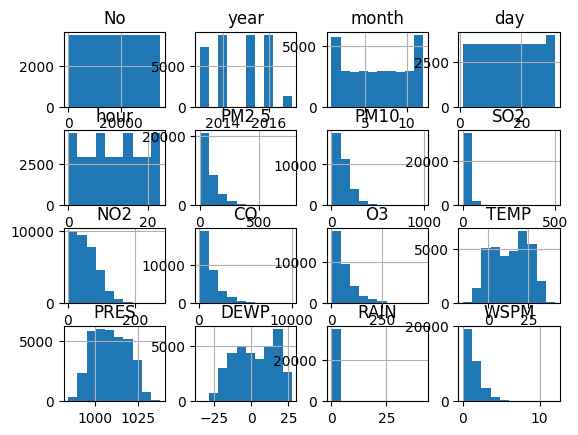

In [ ]:
print(gucheng_df.isna().sum())
print(gucheng_df.hist())

In [ ]:
checkNormality(gucheng_df)

Standard Deviation of No: 10122.24925597073
With p-values of No: ShapiroResult(statistic=0.9549350142478943, pvalue=0.0)
Standard Deviation of year: 1.1772134318198135
With p-values of year: ShapiroResult(statistic=0.8959008455276489, pvalue=0.0)
Standard Deviation of month: 3.4487523600478474
With p-values of month: ShapiroResult(statistic=0.9415743350982666, pvalue=0.0)
Standard Deviation of day: 8.800217529431565
With p-values of day: ShapiroResult(statistic=0.9540229439735413, pvalue=0.0)
Standard Deviation of hour: 6.92228526242799
With p-values of hour: ShapiroResult(statistic=0.9509114623069763, pvalue=0.0)
Standard Deviation of PM2.5: 82.79644460750218
With p-values of PM2.5: ShapiroResult(statistic=nan, pvalue=1.0)
Standard Deviation of PM10: 96.7426255992567
With p-values of PM10: ShapiroResult(statistic=nan, pvalue=1.0)
Standard Deviation of SO2: 21.204526026319193
With p-values of SO2: ShapiroResult(statistic=nan, pvalue=1.0)
Standard Deviation of NO2: 36.47386009283308
Wit

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
fillMissingValues(gucheng_df)

Missing values in No after: 0
Missing values in year after: 0
Missing values in month after: 0
Missing values in day after: 0
Missing values in hour after: 0
Missing values in PM2.5 after: 0
Missing values in PM10 after: 0
Missing values in SO2 after: 0
Missing values in NO2 after: 0
Missing values in CO after: 0
Missing values in O3 after: 0
Missing values in TEMP after: 0
Missing values in PRES after: 0
Missing values in DEWP after: 0
Missing values in RAIN after: 0
Missing values in WSPM after: 0


In [ ]:
guanyuan_df = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/master/PRSA_Data_20130301-20170228/PRSA_Data_Guanyuan_20130301-20170228.csv")
guanyuan_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34448.000000,34635.000000,34590.000000,34405.000000,33311.000000,33891.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.933372,109.023303,17.590941,57.901643,1271.294377,55.795044,13.584607,1011.846920,3.123062,0.067421,1.708496
std,10122.249256,1.177213,3.448752,8.800218,6.922285,80.933497,91.573709,23.600367,35.150857,1164.854945,57.436983,11.399097,10.404047,13.688896,0.910056,1.204071
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,40.000000,3.000000,31.000000,500.000000,7.000000,3.100000,1003.300000,-8.100000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,89.000000,8.000000,51.000000,900.000000,41.000000,14.500000,1011.400000,3.800000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,115.000000,149.000000,22.000000,78.000000,1600.000000,81.000000,23.300000,1020.100000,15.600000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,680.000000,999.000000,293.000000,270.000000,10000.000000,415.000000,40.500000,1042.000000,28.500000,72.500000,11.200000


No            0
year          0
month         0
day           0
hour          0
PM2.5       616
PM10        429
SO2         474
NO2         659
CO         1753
O3         1173
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64
[[<Axes: title={'center': 'No'}> <Axes: title={'center': 'year'}>
  <Axes: title={'center': 'month'}> <Axes: title={'center': 'day'}>]
 [<Axes: title={'center': 'hour'}> <Axes: title={'center': 'PM2.5'}>
  <Axes: title={'center': 'PM10'}> <Axes: title={'center': 'SO2'}>]
 [<Axes: title={'center': 'NO2'}> <Axes: title={'center': 'CO'}>
  <Axes: title={'center': 'O3'}> <Axes: title={'center': 'TEMP'}>]
 [<Axes: title={'center': 'PRES'}> <Axes: title={'center': 'DEWP'}>
  <Axes: title={'center': 'RAIN'}> <Axes: title={'center': 'WSPM'}>]]


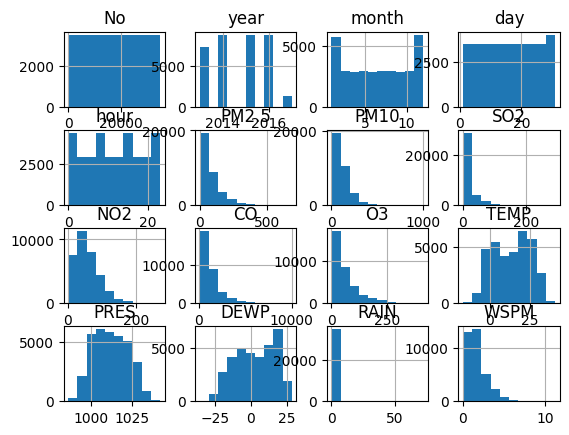

In [ ]:
print(guanyuan_df.isna().sum())
print(guanyuan_df.hist())

In [ ]:
checkNormality(guanyuan_df)

Standard Deviation of No: 10122.24925597073
With p-values of No: ShapiroResult(statistic=0.9549350142478943, pvalue=0.0)
Standard Deviation of year: 1.1772134318198135
With p-values of year: ShapiroResult(statistic=0.8959008455276489, pvalue=0.0)
Standard Deviation of month: 3.4487523600478474
With p-values of month: ShapiroResult(statistic=0.9415743350982666, pvalue=0.0)
Standard Deviation of day: 8.800217529431565
With p-values of day: ShapiroResult(statistic=0.9540229439735413, pvalue=0.0)
Standard Deviation of hour: 6.92228526242799
With p-values of hour: ShapiroResult(statistic=0.9509114623069763, pvalue=0.0)
Standard Deviation of PM2.5: 80.93349731219654
With p-values of PM2.5: ShapiroResult(statistic=nan, pvalue=1.0)
Standard Deviation of PM10: 91.57370871803138
With p-values of PM10: ShapiroResult(statistic=nan, pvalue=1.0)
Standard Deviation of SO2: 23.600366633044654
With p-values of SO2: ShapiroResult(statistic=nan, pvalue=1.0)
Standard Deviation of NO2: 35.15085745143049
Wi

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
fillMissingValues(guanyuan_df)

Missing values in No after: 0
Missing values in year after: 0
Missing values in month after: 0
Missing values in day after: 0
Missing values in hour after: 0
Missing values in PM2.5 after: 0
Missing values in PM10 after: 0
Missing values in SO2 after: 0
Missing values in NO2 after: 0
Missing values in CO after: 0
Missing values in O3 after: 0
Missing values in TEMP after: 0
Missing values in PRES after: 0
Missing values in DEWP after: 0
Missing values in RAIN after: 0
Missing values in WSPM after: 0


In [ ]:
print("Aotizhongxin Duplicates", aotizhongxin_df.duplicated().sum())

print("Changping Duplicates", changping_df.duplicated().sum())

print("Dongsi Duplicates", dongsi_df.duplicated().sum())

print("Dingling Duplicates", dingling_df.duplicated().sum())

print("Wanshouxigong Duplicates", wanshouxigong_df.duplicated().sum())

print("Wanliu Duplicates", wanliu_df.duplicated().sum())

print("Tiantan Duplicates", tiantan_df.duplicated().sum())

print("Shunyi Duplicates", shunyi_df.duplicated().sum())

print("Nongzhanguan Duplicates", nongzhanguan_df.duplicated().sum())

print("Huairou Duplicates", huairou_df.duplicated().sum())

print("Gucheng Duplicates", gucheng_df.duplicated().sum())

print("Guanyuan Duplicates", guanyuan_df.duplicated().sum())

print("THERE ARE NO DUPLICATES YEESSS")

Aotizhongxin Duplicates 0
Changping Duplicates 0
Dongsi Duplicates 0
Dingling Duplicates 0
Wanshouxigong Duplicates 0
Wanliu Duplicates 0
Tiantan Duplicates 0
Shunyi Duplicates 0
Nongzhanguan Duplicates 0
Huairou Duplicates 0
Gucheng Duplicates 0
Guanyuan Duplicates 0
THERE ARE NO DUPLICATES YEESSS


In [ ]:
# area_list = ['aotizhongxin_df','changping_df','dingling_df','dongsi_df','guanyuan_df','gucheng_df','huairou_df','nongzhanguan_df','shunyi_df','tiantan_df','wanliu_df','wanshouxigong_df']

In [ ]:
dfs = {
    'aotizhongxin_df': aotizhongxin_df,
    'changping_df': changping_df,
    'dingling_df': dingling_df,
    'dongsi_df':dongsi_df,
    'guanyuan_df':guanyuan_df,
    'gucheng_df':gucheng_df,
    'huairou_df':huairou_df,
    'nongzhanguan_df':nongzhanguan_df,
    'shunyi_df':shunyi_df,
    'tiantan_df':tiantan_df,
    'wanliu_df':wanliu_df,
    'wanshouxigong_df':wanshouxigong_df
}

area_list = [dfs[area_name] for area_name in area_list]

In [ ]:
for df in area_list:
    df['year'] = pd.to_datetime(df['year'],format='%Y').dt.year

In [ ]:
import calendar
for df in area_list:
  df['month'] = df['month'].apply(lambda x: calendar.month_name[x])
  df['month'] = df['month'].astype('category')
  print(df['month'])

TypeError: list indices must be integers or slices, not str